# Utilities

> Helper Functions that work on individual frames

In [1]:
#default_exp utils

In [2]:
#hide
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#export
import cv2
import numpy as np
import torch
from matplotlib.pyplot import imshow
from typing import Any, Union, Optional, Callable

In [4]:
#export
__all__ = ['makedir', 'get_nframes', 'get_fps', 'as_tensor', 'as_img',
           'bgr2rgb', 'bgr2hsv', 'lapply', 'pil2tensor', 'Image',
           'load_model', 'download_model']

## Convert Image to Other Formats

In [5]:
_, x = cv2.VideoCapture('files/interstellar-waves-edit.mp4').read()
type(x)
x.shape

numpy.ndarray

(480, 720, 3)

---

In [6]:
## SOURCE --> https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L14

def as_tensor(image, dtype:np.dtype = np.float32) -> None:
    "Convert PIL style `image` array to torch style image tensor."
    a = np.asarray(image)
    if a.ndim==2 : a = np.expand_dims(a,2)
    a = np.transpose(a, (1, 0, 2))
    a = np.transpose(a, (2, 1, 0))
    return torch.from_numpy(a.astype(dtype, copy=False) )

In [7]:
type(as_tensor(x))
as_tensor(x).shape

torch.Tensor

torch.Size([3, 480, 720])

---

In [8]:
#export
def as_normalised_tensor(x: np.ndarray) -> torch.Tensor:
    """`np.float32` array --> normalised `torch.Tensor`"""
    return as_tensor(x, np.float32).div_(255)

In [9]:
type(as_normalised_tensor(x))
as_normalised_tensor(x).shape

torch.Tensor

torch.Size([3, 480, 720])

---

In [10]:
#export
def bgr2rgb(x: np.ndarray) -> np.ndarray:
    """convert cv2 generated image array from BGR to RGB"""
    return cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

numpy.ndarray

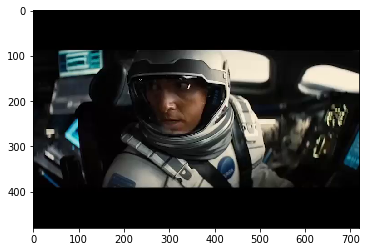

In [11]:
type(bgr2rgb(x))
imshow(bgr2rgb(x))

---

In [12]:
#export
def bgr2hsv(x: np.ndarray) -> np.ndarray:
    """convert cv2 generated image array from BGR to HSV"""
    return cv2.cvtColor(x, cv2.COLOR_BGR2HSV)

In [13]:
type(bgr2hsv(x))
(bgr2hsv(x)).shape

numpy.ndarray

(480, 720, 3)

---

In [14]:
#export
def lapply(x: Any, func: Callable) -> list:
    """Apply `func` to each element in list `x`"""
    return [func(i) for i in x]

In [15]:
type(x)
[type(i) for i in lapply([x, x, x], as_tensor)]

numpy.ndarray

[torch.Tensor, torch.Tensor, torch.Tensor]

---

### Export -

In [16]:
#hide
from nbdev.export import *
notebook2script()

Converted 00_utils.ipynb.
Converted 01_io.ipynb.
